In [ ]:
#Get all essential libraries
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_train_full.dtype

dtype('uint8')

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full.dtype

dtype('uint8')

In [ ]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 7.4119449e-02, -4.9043655e-02,  6.2883660e-02, ...,
        -7.1057945e-02,  4.0953971e-02,  4.7564588e-02],
       [-4.9408615e-02,  1.6111538e-02, -6.9392100e-02, ...,
        -2.9409058e-02,  3.7929453e-02, -5.8826175e-02],
       [ 4.5024723e-02,  5.4398909e-02,  4.9984686e-02, ...,
        -2.1280918e-02, -2.1030214e-02, -5.5185974e-02],
       ...,
       [ 3.6455192e-02,  6.1203271e-02, -1.5212659e-02, ...,
        -8.4951222e-03,  3.7788957e-02, -4.8376128e-02],
       [-5.3688280e-02,  1.8934183e-02, -1.4677435e-02, ...,
        -3.6507845e-06,  4.0756300e-02, -7.3518261e-02],
       [ 2.7359881e-02, -1.5846342e-02,  5.8263227e-02, ...,
         6.3934356e-02, -3.6662478e-02, -5.9915528e-02]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7245 - accuracy: 0.7621 - val_loss: 0.5148 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4892 - accuracy: 0.8293 - val_loss: 0.4578 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4442 - accuracy: 0.8442 - val_loss: 0.4262 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4172 - accuracy: 0.8549 - val_loss: 0.4076 - val_accuracy: 0.8556
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3963 - accuracy: 0.8603 - val_loss: 0.3891 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3813 - accuracy: 0.8655 - val_loss: 0.3668 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3685 - accuracy: 0.8700 - val_loss: 0.3916 - val_accuracy:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

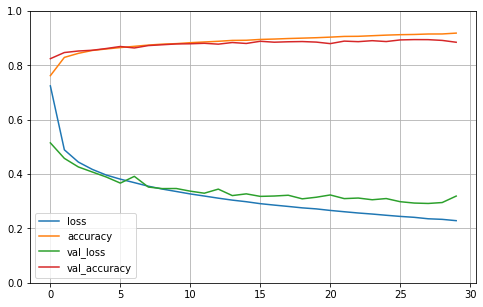

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 83.8270 - accuracy: 0.8243


[83.82704162597656, 0.8242999911308289]

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)